## Feature Selection  through T-test Analysis 

In the process of EDA,within this jupyter notebook, I looked at both correlation and t-test to determine which variables I wanted to include in the regression model. Because I was interested to detect potential relationship between country level emission data as well as company climate action commitments with company emissions, I decided to select only predictors that passed the ttest.
This document is structured in three different sections

1. Section 1: importing libraries and data
2. Section 2: looking at correlation
3. Section 3: performing T-test analysis
4. Section 4: data visualization on the dataset

### Section 1 - Importing libraries and data

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [12]:
df = pd.read_csv('../data/output/msci_company_country.csv')

In [13]:
df.head(1)

,t_date,fsym_id,gics_sector_name,gics_sub_industry_name,port_weight,returns,region,company_cap,country_economy,scope_1_tonnes,...,manufact_construction,transport,electr_heat,buildings,fugitive_emission,other_fuel_combustion,aviation_shipping,Entity,all_emission,scope1_2_emission
0,2013-12-31,H8M907-R,Materials,Diversified Chemicals,0.034897,0.028823,Europe,medium,developed,442.5,...,23452500.0,38092500.0,92435000.0,36645000.0,2502500.0,2722500.0,8092500.0,Germany,2787.305517,1167.25


In [14]:
df.columns

Index(['t_date', 'fsym_id', 'gics_sector_name', 'gics_sub_industry_name',
       'port_weight', 'returns', 'region', 'company_cap', 'country_economy',
       'scope_1_tonnes', 'scope_2_tonnes', 'scope_3_tonnes',
       'net_zero_committed', 'target_status_class_year', 'emissions_lucf',
       'emissions_factor(kg/kwh)', 'emissions_gdp(kg/$ppp)',
       'emissions_in_trade', 'co2_oil', 'co2_cement', 'co2_coal', 'co2_gas',
       'agriculture', 'land_use_forestry', 'waste', 'industry',
       'manufact_construction', 'transport', 'electr_heat', 'buildings',
       'fugitive_emission', 'other_fuel_combustion', 'aviation_shipping',
       'Entity', 'all_emission', 'scope1_2_emission'],
      dtype='object')

In [7]:
#now I want to dummify some other column
df = pd.get_dummies(df, columns=['gics_sector_name', 'gics_sub_industry_name', 'region',  'company_cap', 
                             'country_economy',  'Entity','target_status_class_year', 'net_zero_committed'])

### Section 2 - Correlation Analysis

I will be first creating the correlation df for all my potential targets; then plotting different heatmaps

In [6]:
#creating correlation df
corr_scope1 = df.corr()[['scope_1_tonnes']].sort_values(by=['scope_1_tonnes'], ascending=False)[1:]
corr_scope2 = df.corr()[['scope_2_tonnes']].sort_values(by=['scope_2_tonnes'], ascending=False)[1:]
corr_scope3 = df.corr()[['scope_3_tonnes']].sort_values(by=['scope_3_tonnes'], ascending=False)[1:]
corr_all_emiss = df.corr()[['all_emission']].sort_values(by=['all_emission'], ascending=False)[1:]
corr_scope1_2 = df.corr()[['scope1_2_emission']].sort_values(by=['scope1_2_emission'], ascending=False)[1:]

In [7]:
#creating function to plot heatmap
def heat_map(high_corr):
    plt.figure(figsize=(15,15))
    sns.heatmap(high_corr, vmin=-1, vmax=1, cmap='viridis', annot=True)

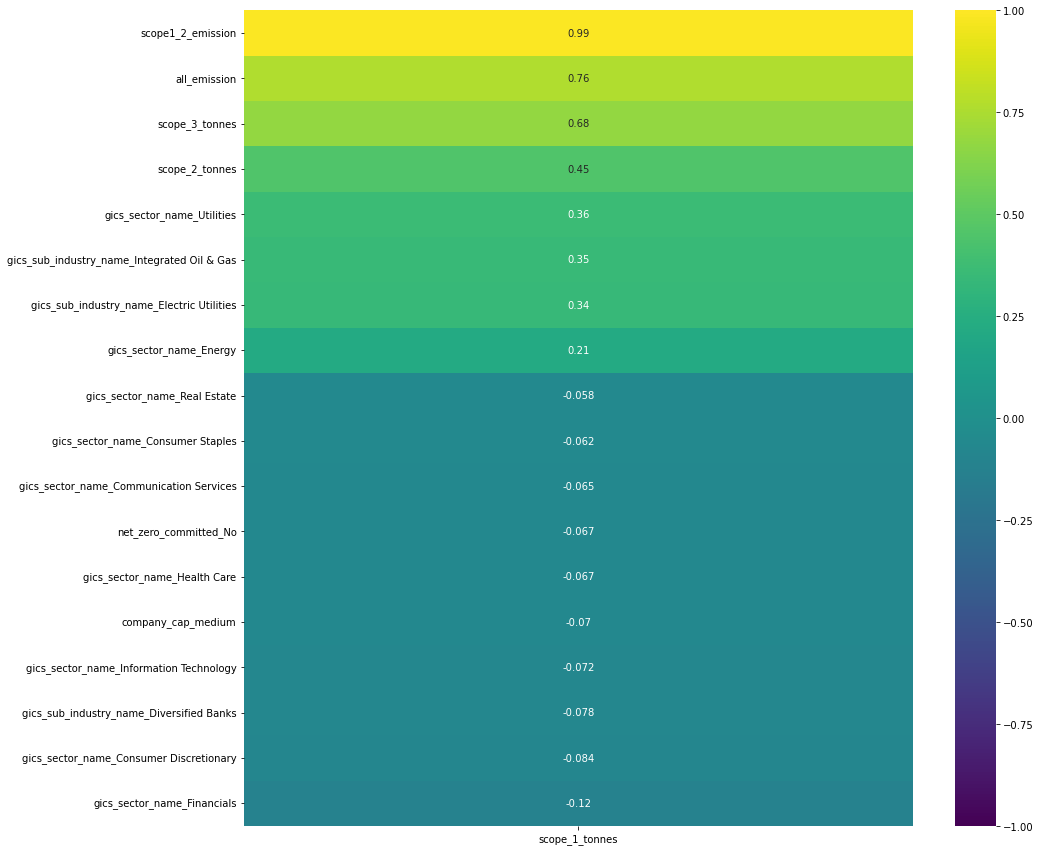

In [8]:
#plotting only most important predictors
high_corr = corr_scope1[(corr_scope1['scope_1_tonnes'] > 0.2) | (corr_scope1['scope_1_tonnes'] < - 0.05)]
heat_map(high_corr)

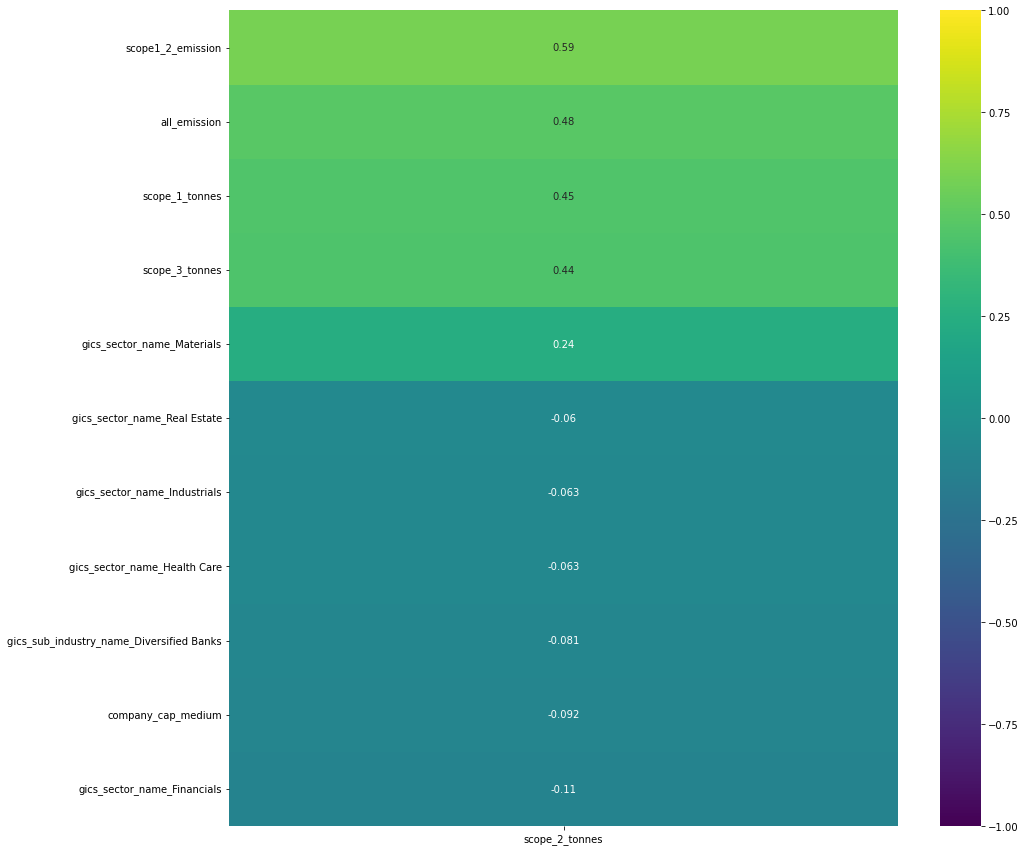

In [9]:
high_corr = corr_scope2[(corr_scope2['scope_2_tonnes'] > 0.2) | (corr_scope2['scope_2_tonnes'] < - 0.05)]
heat_map(high_corr)

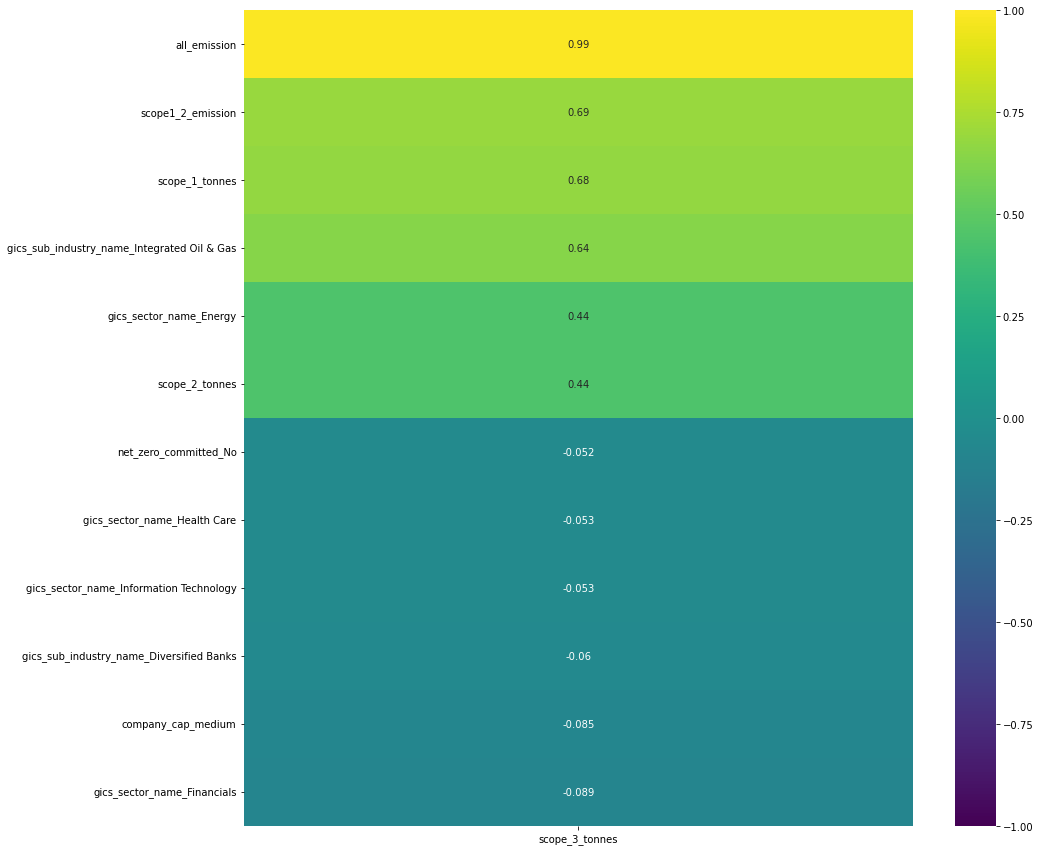

In [10]:
high_corr = corr_scope3[(corr_scope3['scope_3_tonnes'] > 0.2) | (corr_scope3['scope_3_tonnes'] < - 0.05)]
heat_map(high_corr)

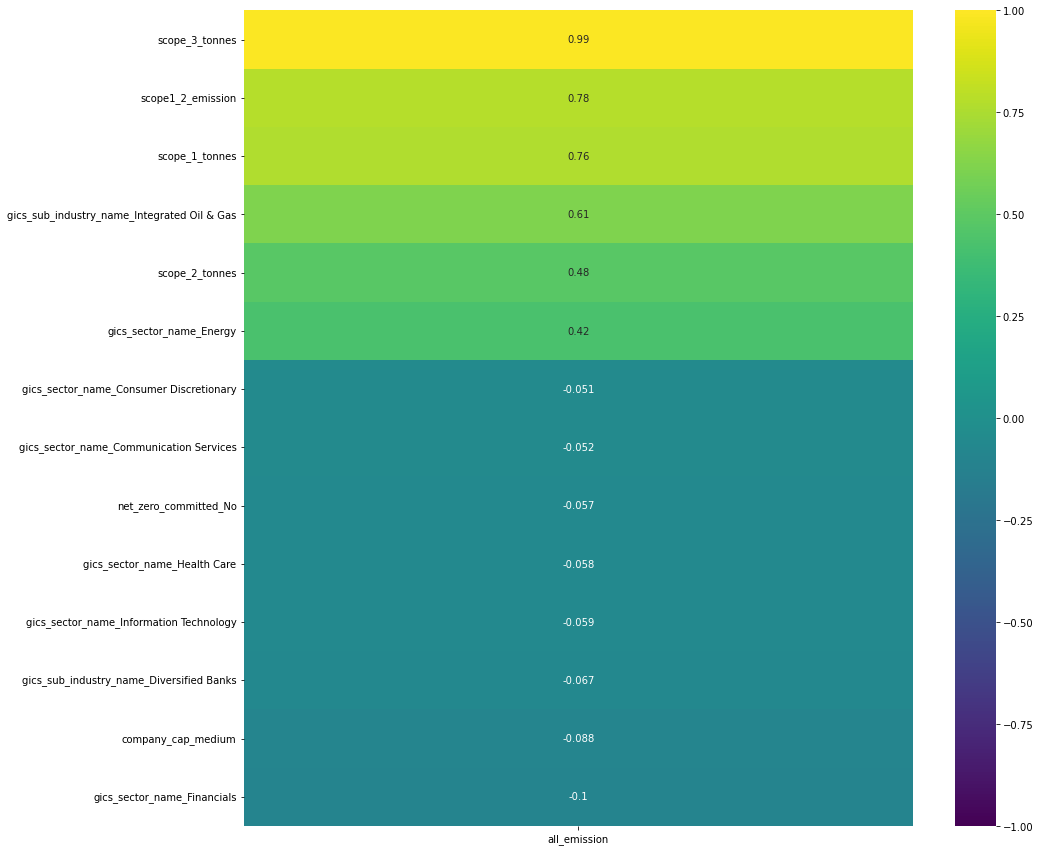

In [11]:
high_corr = corr_all_emiss[(corr_all_emiss['all_emission'] > 0.2) | (corr_all_emiss['all_emission'] < - 0.05)]
heat_map(high_corr)

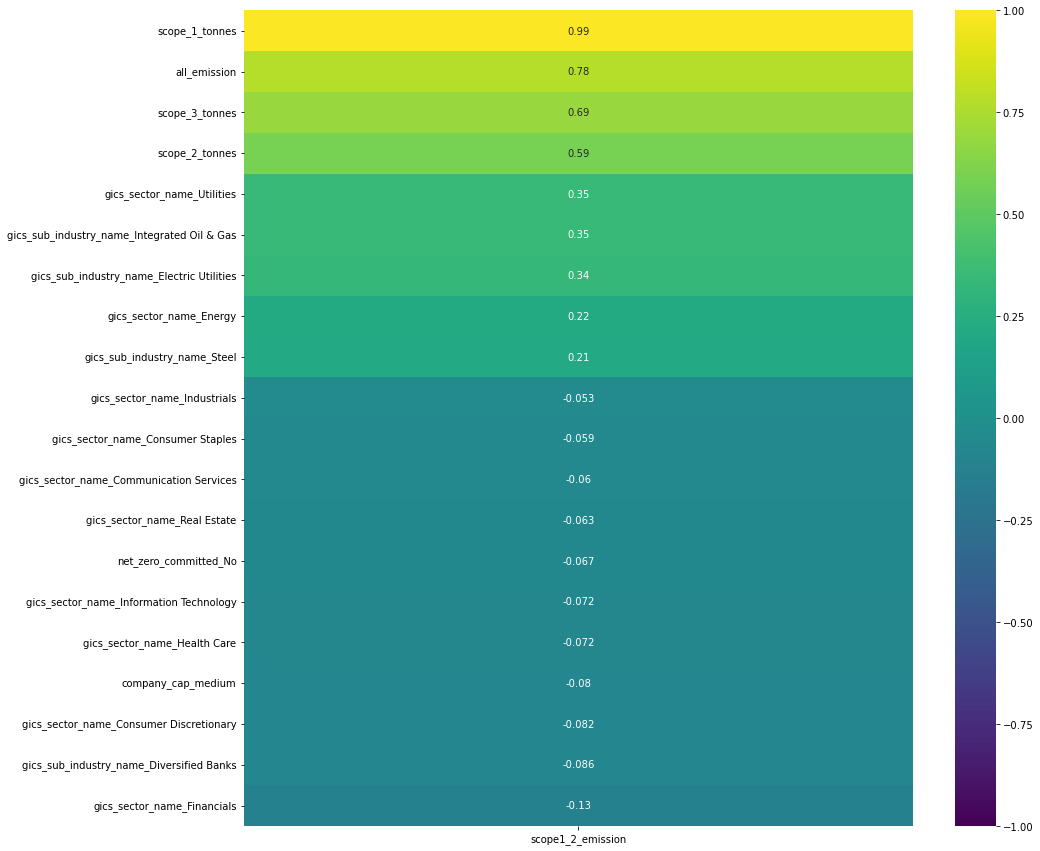

In [12]:
high_corr = corr_scope1_2[(corr_scope1_2['scope1_2_emission'] > 0.2) | (corr_scope1_2['scope1_2_emission'] < - 0.05)]
heat_map(high_corr)

## Section 3 - T-Test Analysis

**Hypothesis Testing** M null hypothesis (H0) is that coefficient of all my predictors are equal to 0. The threshold for this analysis is a p-value of 0.05. I will be performing 5 different hypotesis testing for the five potential predictors. The result of my t-test analysis will be used for regression model. More specifically, the T-test analysis will help me defining the shape of my final targets as well as the predictors. 

In [13]:
#I need to remove object colum
numerical_cols = df.dtypes != 'object'
columns = df.dtypes[numerical_cols].index

In [14]:
#first test on all emissions
X = df[columns].drop(columns=['all_emission', 'scope_1_tonnes', 'scope_2_tonnes', 
                               'scope_3_tonnes', 'scope1_2_emission'])
y = df['all_emission']
X =sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
model1.summary()

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           all_emission   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     208.1
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:59:20   Log-Likelihood:            -5.2055e+05
No. Observations:               46776   AIC:                         1.042e+06
Df Residuals:                   46548   BIC:                         1.044e+06
Df Model:                         227                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                               -1114.9774    774.613     -1.439      0.150   -2633.230     403.275
port_weight                                                          1.572e+04    726.205     21.642      0.000    1.43e+04    1.71e+04
returns                                                              -619.8697    456.608     -1.358      0.175   -1514.828     275.089
emissions_lucf                                                          0.0246      0.051      0.486      0.627      -0.075       0.124
emissions_factor(kg/kwh)                                             6.116e+04   2.56e+04      2.391      0.017     1.1e+04    1.11e+05
emissions_gdp(kg/$ppp)                                               9006.6457   1.16e+04      0.775      0.438   -1.38e+04    3.18e+04
emissions_in_trade                                                     87.5490     22.085      3.964      0.000      44.261     130.837
co2_oil                                                             -3.619e-05   1.45e-05     -2.499      0.012   -6.46e-05    -7.8e-06
co2_cement                                                              0.0002      0.000      1.040      0.298      -0.000       0.000
co2_coal                                                            -3.897e-06   1.52e-05     -0.257      0.798   -3.37e-05    2.59e-05
co2_gas                                                              3.023e-05   2.32e-05      1.303      0.192   -1.52e-05    7.57e-05
agriculture                                                            -0.0246      0.051     -0.486      0.627      -0.124       0.075
land_use_forestry                                                      -0.0246      0.051     -0.486      0.627      -0.124       0.075
waste                                                                  -0.0245      0.051     -0.483      0.629      -0.124       0.075
industry                                                               -0.0246      0.051     -0.487      0.626      -0.124       0.075
manufact_construction                                                  -0.0246      0.051     -0.485      0.627      -0.124       0.075
transport                                                              -0.0246      0.051     -0.486      0.627      -0.124       0.075
electr_heat                                                            -0.0246      0.051     -0.486      0.627      -0.124       0.075
buildings                                                              -0.0246      0.051     -0.486      0.627      -0.124       0.075
fugitive_emission                                                      -0.0246      0.051  

In [15]:
#first test on scope_1_2
X = df[columns].drop(columns=['all_emission', 'scope_1_tonnes', 'scope_2_tonnes', 'scope1_2_emission'])
y = df['scope1_2_emission']
X =sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
model2.summary()

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      scope1_2_emission   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     450.6
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:59:20   Log-Likelihood:            -4.2779e+05
No. Observations:               46776   AIC:                         8.560e+05
Df Residuals:                   46547   BIC:                         8.580e+05
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  22.9708    106.637      0.215      0.829    -186.038     231.980
port_weight                                                           209.3476    100.468      2.084      0.037      12.429     406.266
returns                                                              -229.4768     62.858     -3.651      0.000    -352.678    -106.275
scope_3_tonnes                                                          0.1367      0.001    186.676      0.000       0.135       0.138
emissions_lucf                                                          0.0080      0.007      1.144      0.253      -0.006       0.022
emissions_factor(kg/kwh)                                             1013.7945   3522.074      0.288      0.773   -5889.524    7917.113
emissions_gdp(kg/$ppp)                                              -2433.7089   1599.186     -1.522      0.128   -5568.138     700.720
emissions_in_trade                                                    -17.9753      3.041     -5.911      0.000     -23.936     -12.015
co2_oil                                                              8.054e-06   1.99e-06      4.039      0.000    4.15e-06     1.2e-05
co2_cement                                                           5.941e-05   2.25e-05      2.645      0.008    1.54e-05       0.000
co2_coal                                                             2.826e-06   2.09e-06      1.351      0.177   -1.27e-06    6.92e-06
co2_gas                                                             -8.537e-06   3.19e-06     -2.673      0.008   -1.48e-05   -2.28e-06
agriculture                                                            -0.0080      0.007     -1.144      0.253      -0.022       0.006
land_use_forestry                                                      -0.0080      0.007     -1.144      0.252      -0.022       0.006
waste                                                                  -0.0080      0.007     -1.144      0.253      -0.022       0.006
industry                                                               -0.0080      0.007     -1.147      0.251      -0.022       0.006
manufact_construction                                                  -0.0080      0.007     -1.142      0.253      -0.022       0.006
transport                                                              -0.0080      0.007     -1.144      0.253      -0.022       0.006
electr_heat                                                            -0.0080      0.007     -1.145      0.252      -0.022       0.006
buildings                                                              -0.0080      0.007  

In [16]:
#test on scope_1
X = df[columns].drop(columns=['all_emission', 'scope_1_tonnes', 'scope1_2_emission'])
y = df['scope_1_tonnes']
X =sm.add_constant(X)
model3 = sm.OLS(y, X).fit()
model3.summary()

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         scope_1_tonnes   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     413.0
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:59:21   Log-Likelihood:            -4.2441e+05
No. Observations:               46776   AIC:                         8.493e+05
Df Residuals:                   46546   BIC:                         8.513e+05
Df Model:                         229                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                  82.5849     99.197      0.833      0.405    -111.843     277.013
port_weight                                                          -421.7352     93.750     -4.498      0.000    -605.487    -237.983
returns                                                              -133.7792     58.482     -2.288      0.022    -248.404     -19.154
scope_2_tonnes                                                          0.4182      0.017     25.104      0.000       0.386       0.451
scope_3_tonnes                                                          0.1135      0.001    154.679      0.000       0.112       0.115
emissions_lucf                                                          0.0104      0.006      1.603      0.109      -0.002       0.023
emissions_factor(kg/kwh)                                             -592.6427   3276.328     -0.181      0.856   -7014.295    5829.010
emissions_gdp(kg/$ppp)                                              -1745.7369   1487.608     -1.174      0.241   -4661.470    1169.996
emissions_in_trade                                                    -16.3056      2.829     -5.764      0.000     -21.850     -10.761
co2_oil                                                              9.464e-06   1.85e-06      5.102      0.000    5.83e-06    1.31e-05
co2_cement                                                           5.021e-05   2.09e-05      2.403      0.016    9.26e-06    9.12e-05
co2_coal                                                             5.147e-08   1.95e-06      0.026      0.979   -3.76e-06    3.86e-06
co2_gas                                                             -1.159e-05   2.97e-06     -3.901      0.000   -1.74e-05   -5.76e-06
agriculture                                                            -0.0104      0.006     -1.603      0.109      -0.023       0.002
land_use_forestry                                                      -0.0104      0.006     -1.603      0.109      -0.023       0.002
waste                                                                  -0.0104      0.006     -1.601      0.109      -0.023       0.002
industry                                                               -0.0104      0.006     -1.607      0.108      -0.023       0.002
manufact_construction                                                  -0.0104      0.006     -1.601      0.109      -0.023       0.002
transport                                                              -0.0104      0.006     -1.603      0.109      -0.023       0.002
electr_heat                                                            -0.0104      0.006  

In [17]:
#test on scope_2
X = df[columns].drop(columns=['all_emission', 'scope_2_tonnes', 'scope1_2_emission'])
y = df['scope_2_tonnes']
X =sm.add_constant(X)
model4 = sm.OLS(y, X).fit()
model4.summary()

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         scope_2_tonnes   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     130.0
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:59:22   Log-Likelihood:            -3.6425e+05
No. Observations:               46776   AIC:                         7.290e+05
Df Residuals:                   46546   BIC:                         7.310e+05
Df Model:                         229                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                 -44.1101     27.413     -1.609      0.108     -97.841       9.621
port_weight                                                           452.5077     25.829     17.519      0.000     401.882     503.133
returns                                                               -62.3028     16.160     -3.855      0.000     -93.977     -30.628
scope_1_tonnes                                                          0.0319      0.001     25.104      0.000       0.029       0.034
scope_3_tonnes                                                          0.0125      0.000     51.602      0.000       0.012       0.013
emissions_lucf                                                         -0.0020      0.002     -1.124      0.261      -0.006       0.001
emissions_factor(kg/kwh)                                             1136.5224    905.427      1.255      0.209    -638.128    2911.173
emissions_gdp(kg/$ppp)                                               -422.8683    411.115     -1.029      0.304   -1228.659     382.922
emissions_in_trade                                                     -0.6408      0.782     -0.819      0.413      -2.174       0.892
co2_oil                                                             -1.283e-06   5.13e-07     -2.502      0.012   -2.29e-06   -2.78e-07
co2_cement                                                           4.797e-06   5.77e-06      0.831      0.406   -6.52e-06    1.61e-05
co2_coal                                                             1.928e-06   5.38e-07      3.587      0.000    8.75e-07    2.98e-06
co2_gas                                                              2.492e-06   8.21e-07      3.036      0.002    8.83e-07     4.1e-06
agriculture                                                             0.0020      0.002      1.124      0.261      -0.001       0.006
land_use_forestry                                                       0.0020      0.002      1.125      0.261      -0.001       0.006
waste                                                                   0.0020      0.002      1.120      0.263      -0.002       0.006
industry                                                                0.0020      0.002      1.126      0.260      -0.001       0.006
manufact_construction                                                   0.0020      0.002      1.125      0.261      -0.001       0.006
transport                                                               0.0020      0.002      1.126      0.260      -0.001       0.006
electr_heat                                                             0.0020      0.002  

In [18]:
#test on scope_3
X = df[columns].drop(columns=['all_emission', 'scope_3_tonnes', 'scope_1_tonnes', 'scope_2_tonnes'])
y = df['scope_3_tonnes']
X =sm.add_constant(X)
model5 = sm.OLS(y, X).fit()
model5.summary()

/Users/filoradice/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         scope_3_tonnes   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     516.0
Date:                Tue, 12 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:59:23   Log-Likelihood:            -5.0104e+05
No. Observations:               46776   AIC:                         1.003e+06
Df Residuals:                   46547   BIC:                         1.005e+06
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                -644.4438    510.436     -1.263      0.207   -1644.906     356.019
port_weight                                                          7145.9497    479.798     14.894      0.000    6205.539    8086.361
returns                                                               522.3342    300.918      1.736      0.083     -67.470    1112.139
emissions_lucf                                                         -0.0166      0.033     -0.498      0.618      -0.082       0.049
emissions_factor(kg/kwh)                                             2.709e+04   1.69e+04      1.607      0.108   -5957.940    6.01e+04
emissions_gdp(kg/$ppp)                                               1.338e+04   7654.879      1.748      0.081   -1625.538    2.84e+04
emissions_in_trade                                                    109.3890     14.553      7.516      0.000      80.864     137.914
co2_oil                                                             -4.749e-05   9.54e-06     -4.976      0.000   -6.62e-05   -2.88e-05
co2_cement                                                             -0.0001      0.000     -1.214      0.225      -0.000    8.02e-05
co2_coal                                                            -1.223e-05      1e-05     -1.222      0.222   -3.19e-05    7.39e-06
co2_gas                                                              4.624e-05   1.53e-05      3.025      0.002    1.63e-05    7.62e-05
agriculture                                                             0.0166      0.033      0.498      0.619      -0.049       0.082
land_use_forestry                                                       0.0166      0.033      0.498      0.618      -0.049       0.082
waste                                                                   0.0167      0.033      0.500      0.617      -0.049       0.082
industry                                                                0.0167      0.033      0.500      0.617      -0.049       0.082
manufact_construction                                                   0.0166      0.033      0.497      0.619      -0.049       0.082
transport                                                               0.0166      0.033      0.498      0.619      -0.049       0.082
electr_heat                                                             0.0166      0.033      0.499      0.618      -0.049       0.082
buildings                                                               0.0166      0.033      0.497      0.619      -0.049       0.082
fugitive_emission                                                       0.0168      0.033  

**Conclusions** The five t-test analysis suggest that best prediction performances are reached by combining scope 1 and scope 2 together, while  leaving scope 3 emissions on its own. The decision of leaving Scope 3 as a separate target, is also supported by the fact that this type of emission tends to be often times less reliable due to the complexity of its calculation. Below I am saving only the predictors that passed the T-test analysis. It is in the Regression Modeling Notebook that I am making conclusions on different predictors

In [19]:
# Saving Best Predictors for scope 3
scope3_pvalue = pd.DataFrame(model5.pvalues, columns=['p_value'])
scope3_predictors = scope3_pvalue[scope3_pvalue['p_value']< 0.05]

# Saving Best Predictors for scope 1 and 2
scope12_pvalue = pd.DataFrame(model2.pvalues, columns=['p_value'])
scope12_predictors = scope12_pvalue[scope12_pvalue['p_value']< 0.05]

In [20]:
scope12_predictors.to_csv('../data/output/predictor_scope12.csv')
scope3_predictors.to_csv('../data/output/predictor_scope3.csv')

### Section 4 - Dataset key characteristics

In [21]:
#importing and cleaning my df for EDA & Data Vis
df = pd.read_csv('../data/output/msci_company_country.csv')
df = df.drop(columns=['all_emission', 'scope_1_tonnes', 'scope_2_tonnes'])
#dropping the duplicates companies
df['t_date'] = pd.to_datetime(df['t_date'])
df['year'] = df['t_date'].dt.year
df['month'] = df['t_date'].dt.month
df = df.sort_values(by=["fsym_id", "year", 'month'])
df = df.drop_duplicates(subset=["fsym_id"], keep='last')

In [22]:
#Function for barh
def plot_barh(x,y,x_axis, title):
    plt.figure(figsize=(10,8))
    plt.barh(x,y, color='skyblue')
    plt.xlabel(f'{x_axis}', fontdict= {'fontsize':14})
    plt.title(f'{title}', fontdict = {'fontsize':15})
    plt.tight_layout()


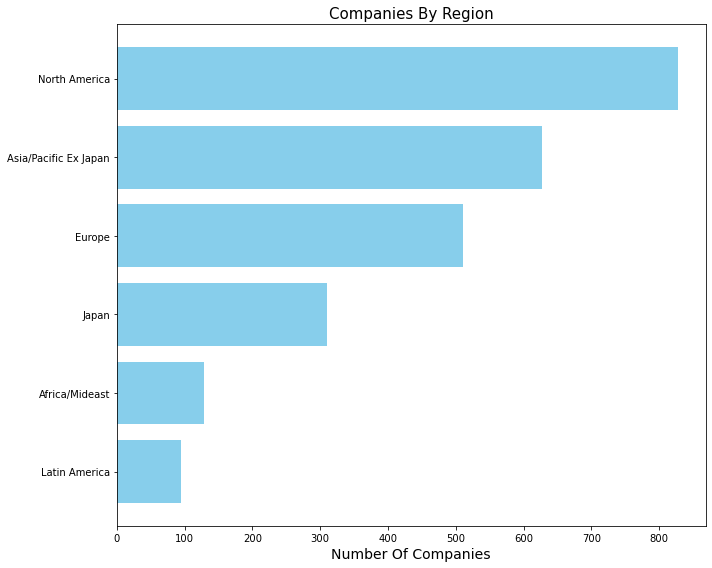

In [27]:
#Looking at number of companies by region in descending order
region = df.groupby('region').count()['fsym_id'].sort_values(ascending=True).reset_index()
plot_barh(region['region'], region['fsym_id'],'Number Of Companies', 'Companies By Region')
plt.savefig('../images/companies_by_region_1.png')

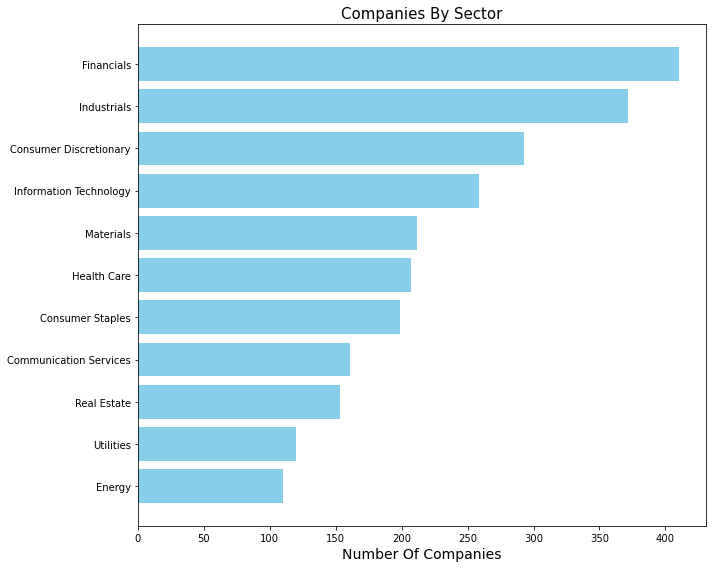

In [28]:
#looking number of companies by industry
industry = df.groupby('gics_sector_name').count()['fsym_id'].sort_values(ascending=True).reset_index()
plot_barh(industry['gics_sector_name'], industry['fsym_id'], 'Number Of Companies','Companies By Sector')
plt.savefig('../images/companies_by_industry_1.png')

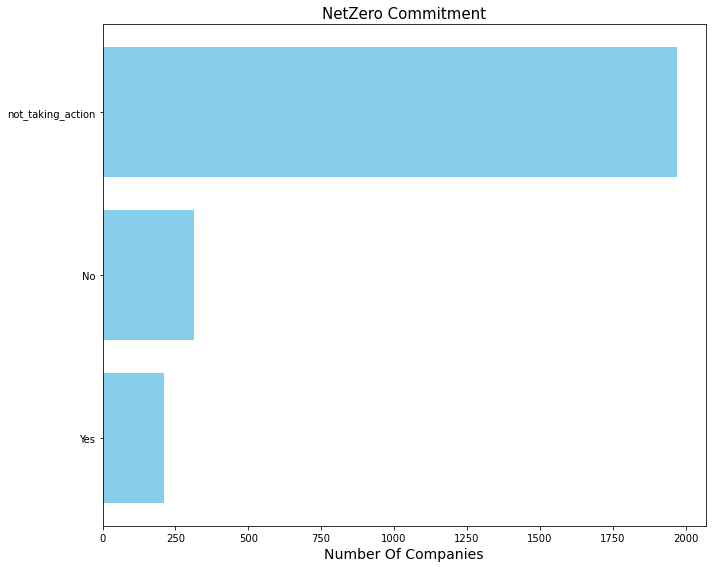

In [29]:
netzero_company = df.groupby('net_zero_committed').count()['fsym_id'].sort_values(ascending=True).reset_index()
plot_barh(netzero_company['net_zero_committed'], netzero_company['fsym_id'], 'Number Of Companies','NetZero Commitment')
plt.savefig('../images/companies_netzerocommitment_1.png')